In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import * 

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

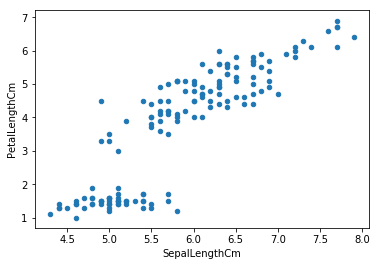

In [5]:
df[features].plot.scatter(0, 1)

In [7]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df[features])

In [10]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
df["cluster"] = kmeans.predict(X)

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [18]:
df.cluster.value_counts()

2    54
0    53
1    43
Name: cluster, dtype: int64

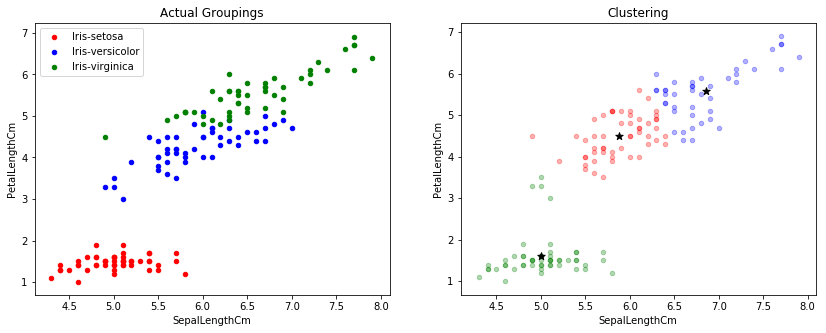

In [41]:
colors =  ["red", "blue", "green"]
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

for i, v in enumerate(df.Species.unique()):
    df[features][df.Species == v].plot.scatter(0, 1
                            , color = colors[i], ax = axes[0], label = v)
axes[0].set_title("Actual Groupings")



for i in range(k):
    df[features][df.cluster == i].plot.scatter(0, 1, color = colors[i]
                                , ax = axes[1], alpha = 0.3)
axes[1].set_title("Clustering")

pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_)
             , columns = features).plot.scatter(0, 1, ax = axes[1]
            , color = "black", s = 60, marker = "*")
    

In [32]:
metrics.homogeneity_score(df.Species, df.cluster)

0.5826296711195839

In [35]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_)
             , columns = features)

,SepalLengthCm,PetalLengthCm
0,5.873585,4.492453
1,6.858140,5.567442
2,5.005556,1.598148


In [47]:
df["distance"] = 0


for i in range(k):
    points = X[df.cluster == i]
    centroid = kmeans.cluster_centers_[i].reshape((1, 2))
    distance = metrics.euclidean_distances(points, centroid).flatten()
    df.loc[df.cluster == i, "distance"] = distance
    print(distance.shape)

(53,)
(43,)
(54,)


In [43]:
kmeans.cluster_centers_[0].reshape((1, 2))

array([[0.03665519, 0.41727267]])

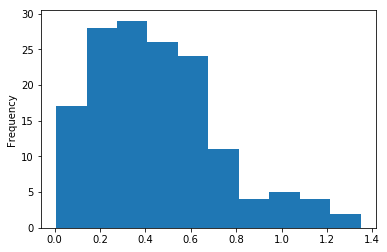

In [49]:
df.distance.plot.hist()

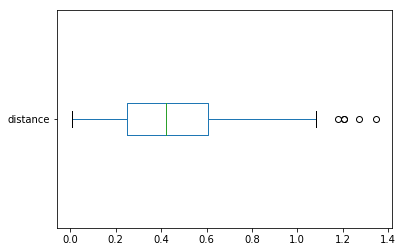

In [55]:
df.distance.plot.box(vert = False)

In [58]:
import numpy as np
def find_outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3-q1
    uw = min(y.max(), q3 + 1.5 * iqr)
    lw = max(y.min(), q1 - 1.5 * iqr)
    print("upper whisker: ", uw, "lower whisker: ", lw)
    return (y>uw) | (y<lw)

In [59]:
df["anamoly"] = find_outlier(df.distance)

upper whisker:  1.139398462070305 lower whisker:  0.006813420341945165


In [60]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,anamoly
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2,0.160599,False
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2,0.170454,False
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2,0.407209,False
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2,0.494562,False
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2,0.112879,False


In [61]:
df[df.anamoly]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,anamoly
106,107,4.9,2.5,4.5,1.7,Iris-virginica,0,1.179680,True
117,118,7.7,3.8,6.7,2.2,Iris-virginica,1,1.206364,True
118,119,7.7,2.6,6.9,2.3,Iris-virginica,1,1.270726,True
122,123,7.7,2.8,6.7,2.0,Iris-virginica,1,1.206364,True
131,132,7.9,3.8,6.4,2.0,Iris-virginica,1,1.348258,True


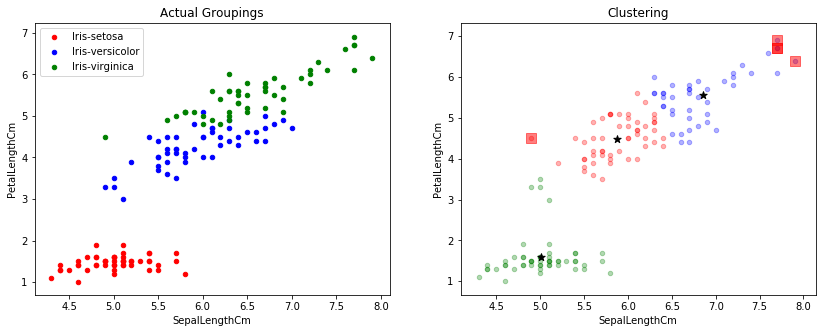

In [65]:
colors =  ["red", "blue", "green"]
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

for i, v in enumerate(df.Species.unique()):
    df[features][df.Species == v].plot.scatter(0, 1
                            , color = colors[i], ax = axes[0], label = v)
axes[0].set_title("Actual Groupings")



for i in range(k):
    df[features][df.cluster == i].plot.scatter(0, 1, color = colors[i]
                                , ax = axes[1], alpha = 0.3)
axes[1].set_title("Clustering")

pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_)
             , columns = features).plot.scatter(0, 1, ax = axes[1]
            , color = "black", s = 60, marker = "*")

df[df.anamoly][features].plot.scatter(0, 1, color = "red", ax = axes[1], marker = "s"
                                    , s = 100, alpha = 0.5)

In [66]:
kmeans.inertia_

43.03887066676178

In [69]:
scores = {}
for i in range(2, 20):
    kmeans = cluster.KMeans(n_clusters = i)
    kmeans.fit(X)
    scores[i] = kmeans.inertia_

Text(0, 0.5, 'Inertia Score')

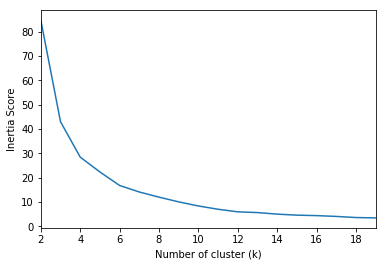

In [71]:
pd.Series(scores).plot()
plt.xlabel("Number of cluster (k)")
plt.ylabel("Inertia Score")